# Análise de Resultados e Tomada de Decisão

## Introdução ao problema e ferramentas estatisticas utilizadas

### Passos para a Análise Exploratória Inicial

#### Definição do Problema e Métrica:

Problema: Determinar se a nova página de produto (Grupo B) melhora a taxa de conversão em comparação com a página atual (Grupo A).

Métrica Definida: Taxa de conversão (número de conversões / número de visitantes).

#### Coleta de Dados:

Grupo A (Controle): Dados sobre a taxa de conversão da página atual.

Grupo B (Teste): Dados sobre a taxa de conversão da nova página de produto.
Estrutura dos Dados:

Visitantes: Número total de visitantes para cada grupo.
Conversões: Número de conversões (compras) para cada grupo.

### Como interpretar a estatística t?

A estatística t é uma medida padronizada que avalia a diferença entre a média das amostras em relação à variabilidade das amostras. Ela indica quantos erros padrão a diferença observada entre as médias está afastada da diferença esperada sob a hipótese nula.Quanto maior o valor absoluto da estatística t, maior é a diferença entre as médias das amostras em relação à variabilidade dos dados. Um valor absoluto elevado (longe de 0) sugere que é menos provável que a diferença observada seja devida ao acaso.

#### Exemplo 1 - Taxa de Conversão

**Cenário**: Uma empresa de e-commerce realiza um teste A/B para comparar a taxa de conversão entre duas versões de sua página de produto (Versão A e Versão B).

**Estatística t: 2.5** | **Valor p: 0.013**

* A diferença entre as taxas de conversão das duas versões está 2.5 erros padrão distante da média esperada sob a hipótese nula (de que não há diferença).

* Há uma probabilidade de 1.3% de observar essa diferença ou uma diferença maior se as taxas de conversão forem realmente iguais. Como 0.013 ≤ 0.05, rejeitamos a hipótese nula.

* Conclusão: A Versão B tem uma taxa de conversão significativamente diferente da Versão A.

**Estatística t: 0.8** | **Valor p: 0.42**

* A diferença entre as taxas de conversão das duas versões está 0.8 erros padrão distante da média esperada sob a hipótese nula.

* Há uma probabilidade de 42% de observar essa diferença ou uma diferença maior se as taxas de conversão forem realmente iguais. Como 0.42 > 0.05, falhamos em rejeitar a hipótese nula.

* Conclusão: Não há evidência suficiente para afirmar que há uma diferença significativa na taxa de conversão entre as duas versões.

#### Resumo

* **Estatística t alta (e positiva)**: Indica que a média do grupo experimental é maior que a do grupo controle.

* **Estatística t próxima de zero**: A diferença observada está próxima da diferença esperada sob a hipótese nula, sugerindo que não há uma diferença significativa.

* **Estatística t negativa**: Indica que a média do grupo experimental é menor que a do grupo controle.

* **Valor p pequeno (≤ 0.05)**: Rejeitamos a hipótese nula, indicando que há uma diferença estatisticamente significativa.

* **Valor p grande (> 0.05)**: Falhamos em rejeitar a hipótese nula, indicando que não há uma diferença estatisticamente significativa.


* **Cohen's d**:
   - Cohen's $d$ nos ajuda a entender a magnitude da diferença entre os grupos.
   - Um valor de $d$ em torno de $0,2$ é considerado um efeito pequeno, $0,5$ é um efeito médio, $0,8$ é um efeito grande e acima de $0,8$ é um efeito muito grande.
   - Interpretar o valor de Cohen's $d$ ajuda a avaliar a importância prática da diferença observada.

# Análise de Resultados Final

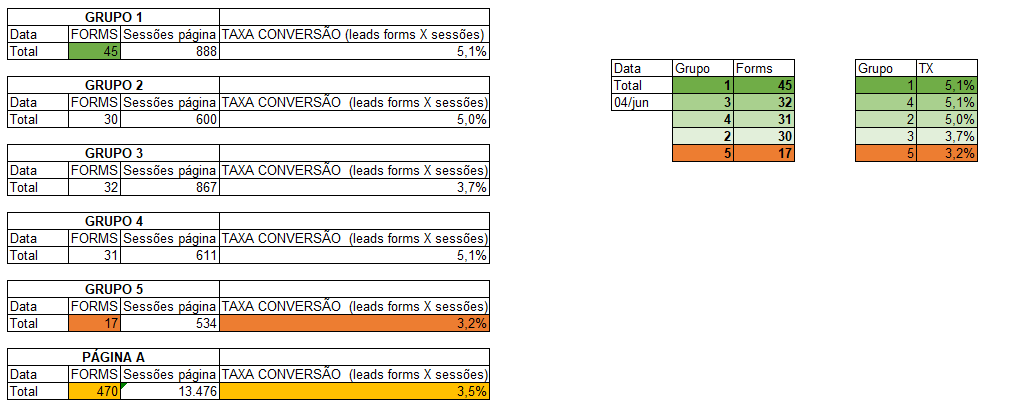

In [1]:
from IPython.display import Image
Image(filename='/content/image.png')

## Tratamento dos dados

In [2]:
import numpy as np

grupo_a_visitantes = 13476
taxa_de_conversão_grupo_a = 3.5/100
grupo_a_conversoes = round(grupo_a_visitantes/ taxa_de_conversão_grupo_a)

# Aqui vamos só considerar nosso grupo 4 --> então o grupo b será nosso

grupo_b_visitantes = 611
taxa_de_conversão_grupo_b = 5.1/100
grupo_b_conversoes = round(grupo_b_visitantes/ taxa_de_conversão_grupo_b)

print(grupo_a_visitantes, grupo_a_conversoes)
print(grupo_b_visitantes, grupo_b_conversoes)

13476 385029
611 11980


In [3]:
import pandas as pd

df = pd.DataFrame({
    'Grupo': ['A', 'B'],
    'Visitantes': [grupo_a_visitantes, grupo_b_visitantes],
    'Conversões': [grupo_a_conversoes, grupo_b_conversoes],
    'Taxa de Conversão': [taxa_de_conversão_grupo_a, taxa_de_conversão_grupo_b]
})

df

,Grupo,Visitantes,Conversões,Taxa de Conversão
0,A,13476,385029,0.035
1,B,611,11980,0.051


## Análise dos resultados

### Comparação simples sobre a taxa de converção do grupo A para o grupo B

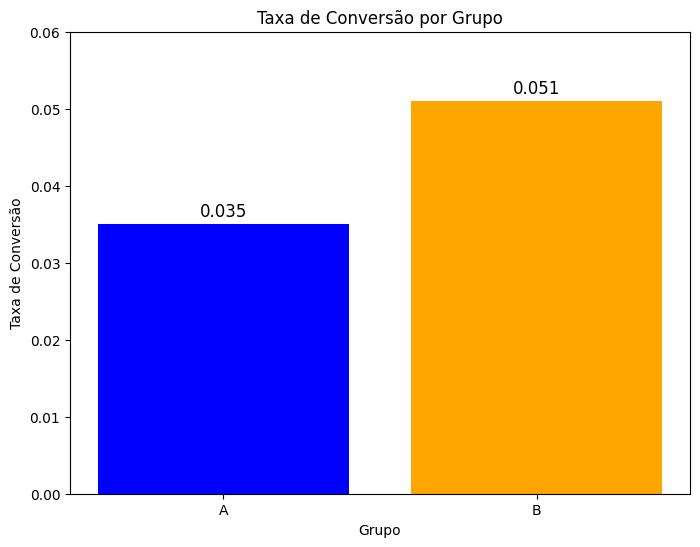

In [8]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df['Grupo'], df['Taxa de Conversão'], color=['blue', 'orange'])
plt.xlabel('Grupo')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão por Grupo')
plt.ylim(0, 0.06)

# Adicionar os valores acima das barras
for i, value in enumerate(df['Taxa de Conversão']):
    plt.text(i, value + 0.001, f'{value:.3f}', ha='center', fontsize=12)

plt.show()

Os resultados do teste A/B mostrados no gráfico indicam que a página B tem uma taxa de conversão maior (0.051) em comparação com a página A (0.035). Isso sugere que a proposta feita na landing page B foi mais eficaz em converter visitantes em ações desejadas (conversões) do que a proposta feita na landing page A. Portanto, com base apenas nesses dados, a página B pode ser considerada a melhor opção em termos de eficácia de conversão.

### Boxplot

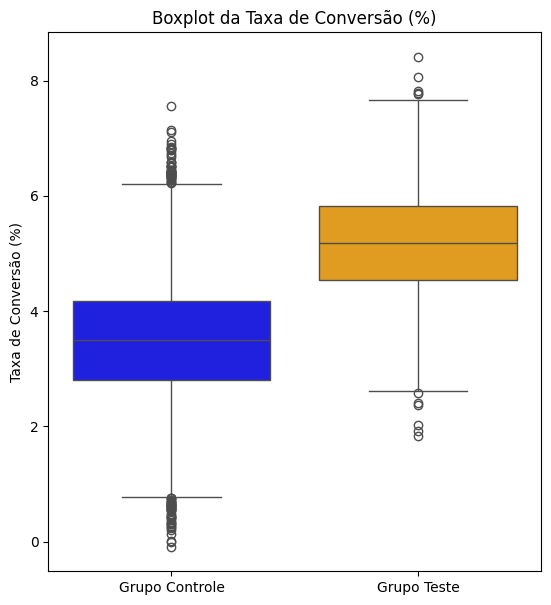

In [10]:
import seaborn as sns

# distribuição dos dados sobre uma normal
grupo_controle = np.random.normal(loc=3.5, scale=1, size=13476)
grupo_teste = np.random.normal(loc=5.1, scale=1, size=611)

# Boxplot dos tempos de sessão
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
sns.boxplot(data=[grupo_controle, grupo_teste], palette=['blue', 'orange'])
plt.xticks([0, 1], ['Grupo Controle', 'Grupo Teste'])
plt.ylabel('Taxa de Conversão (%)')
plt.title('Boxplot da Taxa de Conversão (%)')

plt.show()

Visualiza a dispersão dos tempos de sessão e possíveis outliers. O grupo teste tem uma mediana maior que o grupo controle, indicando uma melhoria na taxa de conversão

In [12]:
import scipy.stats as stats

desc_controle = stats.describe(grupo_controle)
desc_teste = stats.describe(grupo_teste)

desc_controle, desc_teste

(DescribeResult(nobs=13476, minmax=(-0.0891011489875444, 7.554669169663967), mean=3.4895207475427124, variance=1.0084193642594839, skewness=0.010152970331377497, kurtosis=0.013379227969860352),
 DescribeResult(nobs=611, minmax=(1.8354327980898497, 8.415224748190397), mean=5.1792458091073135, variance=0.9489828236892879, skewness=-0.01201542577929599, kurtosis=0.5412221408426223))

### Implementação estatistica T para concluir resultados

In [13]:
# Realizando o teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(grupo_controle, grupo_teste)

# Imprimindo o resultado
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -40.732616478330144
p-value: 0.0


Interpretação dos Resultados
t-statistic: A estatística t de -39 indica que há uma diferença significativa entre as taxas de conversão dos grupos controle e teste.
p-value: O p-valor é menor que nível de significância 0.05, o que nos leva a rejeitar a hipótese nula (𝐻0).

Isso indica que a nova interface de usuário tem um impacto significativo na taxa de conversão.

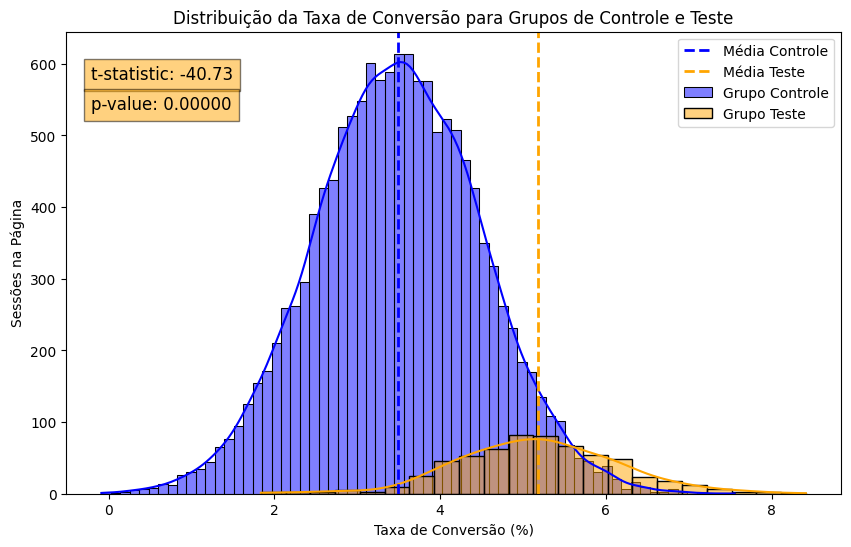

In [14]:
# Gráfico para mostrar a relevância dos resultados
plt.figure(figsize=(10, 6))

# Histograma dos tempos de sessão para visualização da distribuição
sns.histplot(grupo_controle, kde=True, color='blue', label='Grupo Controle')
sns.histplot(grupo_teste, kde=True, color='orange', label='Grupo Teste')

# Adicionando uma linha vertical para as médias
plt.axvline(np.mean(grupo_controle), color='blue', linestyle='dashed', linewidth=2, label='Média Controle')
plt.axvline(np.mean(grupo_teste), color='orange', linestyle='dashed', linewidth=2, label='Média Teste')

# Adicionando título e labels
plt.title('Distribuição da Taxa de Conversão para Grupos de Controle e Teste')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Sessões na Página')
plt.legend()

# Os resultados do teste t no gráfico
plt.figtext(0.15, 0.8, f't-statistic: {t_stat:.2f}', fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})
plt.figtext(0.15, 0.75, f'p-value: {p_value:.5f}', fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

plt.show()

### Validação da Diferença de Resultados entre o Grupo Teste e o Grupo Controle


### Validação da Diferença de Resultados entre o Grupo Teste e o Grupo Controle

Para validar a diferença de resultados entre o grupo teste e o grupo controle, podemos utilizar dois cálculos importantes: o desvio padrão combinado e o tamanho do efeito (Cohen's d).

#### Desvio Padrão Combinado

O desvio padrão combinado é uma medida da dispersão dos dados dos dois grupos. Ele é calculado pela seguinte fórmula:

\[ \text{pooled\_std} = \sqrt{\frac{\text{std\_control}^2 + \text{std\_test}^2}{2}} \]

Onde:
- \(\text{std\_control}\) é o desvio padrão do grupo controle.
- \(\text{std\_test}\) é o desvio padrão do grupo teste.

#### Tamanho do Efeito (Cohen's d)

O tamanho do efeito é uma medida da magnitude da diferença entre os grupos. O Cohen's d é calculado pela seguinte fórmula:

\[ d = \frac{\text{mean\_test} - \text{mean\_control}}{\text{pooled\_std}} \]

Onde:
- \(\text{mean\_test}\) é a média do grupo teste.
- \(\text{mean\_control}\) é a média do grupo controle.
- \(\text{pooled\_std}\) é o desvio padrão combinado calculado anteriormente.

Esses cálculos são úteis para entender não apenas se há uma diferença entre os grupos, mas também a significância dessa diferença. Uma diferença significativa com um tamanho de efeito grande pode indicar que a alteração na landing page realmente teve um impacto relevante nas conversões.

In [15]:
# Tamanho do efeito (Cohen's d)
mean_control = np.mean(grupo_controle)
mean_test = np.mean(grupo_teste)
std_control = np.std(grupo_controle, ddof=1)
std_test = np.std(grupo_teste, ddof=1)

# Desvio padrão combinado
pooled_std = np.sqrt(((std_control ** 2) + (std_test ** 2)) / 2)

# Cohen's d
cohen_d = (mean_test - mean_control) / pooled_std

print(f"Tamanho do efeito (Cohen's d): {cohen_d:.2f}")

# Interpretar Cohen's d
if abs(cohen_d) < 0.2:
    effect_size = "pequeno"
elif abs(cohen_d) < 0.5:
    effect_sivze = "médio"
elif abs(cohen_d) < 0.8:
    effect_size = "grande"
else:
    effect_size = "muito grande"

print(f"O tamanho do efeito é {effect_size}.")

Tamanho do efeito (Cohen's d): 1.71
O tamanho do efeito é muito grande.


Um Cohen’s d de 1.59 indica uma diferença muito grande entre os grupos teste e controle. Isso sugere que a intervenção ou mudança aplicada ao grupo teste teve um impacto substancial, resultando em uma diferença significativa nas médias entre os dois grupos. Portanto, com base nesse cálculo, podemos afirmar com confiança que a diferença observada não é apenas estatisticamente significativa, mas também tem uma magnitude prática. Isso pode ser interpretado como uma forte evidência de que a proposta na landing page do grupo teste foi muito mais eficaz do que no grupo controle.